#**Análisis de ingresantes por Modalidad Ordinaria a la UNI**

In [117]:
# Instalar librerias no incluídas por defecto
!pip install folium pandas
!pip install unidecode
# Cargar las librerías principales
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from unidecode import unidecode

# Montar Google Drive
drive.mount('/content/drive')

# Cambiar al directorio donde está el archivo (Nótese que debe ser creado en el directorio definido y puede variar por cada usuario)
# Es importante tener en cuenta que el archivo .csv debe estar cargado en el directorio
os.chdir('/content/drive/MyDrive/Colab Notebooks/Concurso - Exprésate con Datos/')

# Verificar el directorio actual
current_directory = os.getcwd()
print("Directorio actual:", current_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directorio actual: /content/drive/MyDrive/Colab Notebooks/Concurso - Exprésate con Datos


# ETAPA 1: CARGA DE DATOS OBTENIDOS

## Entendimiento de los Datos

La información de los ingresantes a la UNI está conformada principalmente por una tabla obtenida a partir del primer Google Colab:


1.   Base con todos los postulantes y sus respectivos datos geográficos.


La base tiene los siguientes campos:

*   COLEGIO_DEPA: Departamento del colegio del postulante.
*   COLEGIO_PROV: Provincia del colegio del postulante.
*   COLEGIO_DIST: Distrito del colegio del postulante.
*   COLEGIO_PAIS: Pais del colegio del postulante.
*   ESPECIALIDAD: Especialidad del postulante.
*   ANIO_POSTULA: Año de postulación.
*   DOMICILIO_DEPA: Departamento del domicilio del postulante.
*   DOMICILIO_PROV: Provincia del domicilio del postulante.
*   DOMICILIO_DIST: Distrito del domicilio del postulante.
*   NACIMIENTO_PAIS: Pais de nacimiento del postulante.
*   NACIMIENTO_DEPA: Departamento de nacimiento del postulante.
*   NACIMIENTO_PROV: Provincia de nacimiento del postulante.
*   NACIMIENTO_DIST: Distrito de nacimiento del postulante.
*   SEXO: (F) femenino, (M) masculino.
*   CALIF_FINAL: Calificación final.
*   INGRESO: (SI) ingresó, (NO) no ingresó.
*   N° INTENTO: Número de postulación.
*   EDAD: Edad del postulante.
*   ANIOS_DE_EGRESO_COLEGIO: Años desde el egreso del colegio.
*   LONGITUD_DOMICILIO: Longitud del distrito de domicilio del postulante.
*   LATITUD_DOMICILIO: Longitud del distrito de domicilio del postulante.
*   DISTANCIA_KM: Distancia calculada del domicilio del postulante a la UNI.
*   DISTANCIA_KM_REAL: Distancia real* del domicilio del postulante a la UNI.


**Nótese que real hace referencia a la distancia por calles en Google Maps**

In [118]:
# Cargamos un archivo excel
df = pd.read_excel("Dataframe con coordenadas reales.xlsx")

#Identificamos los tipos de datos

In [119]:
#Nuestra variable objetivo en principio es INGRESO
df.dtypes
#Observación: Se verifica que existen muchas variables  object por defecto que están más relacionadas a ser factores.
df['COLEGIO_DEPA'] = df['COLEGIO_DEPA'].astype('category')
df['COLEGIO_PROV'] = df['COLEGIO_PROV'].astype('category')
df['COLEGIO_DIST'] = df['COLEGIO_DIST'].astype('category')
df['COLEGIO_PAIS'] = df['COLEGIO_PAIS'].astype('category')
df['ESPECIALIDAD'] = df['ESPECIALIDAD'].astype('category')
df['DOMICILIO_DEPA'] = df['DOMICILIO_DEPA'].astype('category')
df['DOMICILIO_PROV'] = df['DOMICILIO_PROV'].astype('category')
df['DOMICILIO_DIST'] = df['DOMICILIO_DIST'].astype('category')
df['NACIMIENTO_PAIS'] = df['NACIMIENTO_PAIS'].astype('category')
df['NACIMIENTO_DEPA'] = df['NACIMIENTO_DEPA'].astype('category')
df['NACIMIENTO_PROV'] = df['NACIMIENTO_PROV'].astype('category')
df['NACIMIENTO_DIST'] = df['NACIMIENTO_DIST'].astype('category')
df['SEXO'] = df['SEXO'].astype('category')

#INGRESO	int64 *** variable objetivo

# Se define el orden de las categorias. Aca 0<1
categorias = [0, 1]

# Se guarda la version numerica de la variable (para analisis exploratorio)
df['INGRESO_NUM'] = pd.Series(df['INGRESO'])

# Se sobreescribe la columna con su forma transformada
df['INGRESO'] = pd.Categorical(df['INGRESO'],
                             categories=categorias,
                             ordered=True)

In [120]:
df.dtypes

,0
COLEGIO_DEPA,category
COLEGIO_PROV,category
COLEGIO_DIST,category
COLEGIO_PAIS,category
ESPECIALIDAD,category
ANIO_POSTULA,int64
DOMICILIO_DEPA,category
DOMICILIO_PROV,category
DOMICILIO_DIST,category
NACIMIENTO_PAIS,category


#¿La variable objetivo se encuentra balancedada?

In [121]:
df.INGRESO.value_counts()

,count
INGRESO,
0,20888
1,3161


In [122]:
3161/(20888+3161)

0.13143997671420848

**Está desbalanceado (aprox. 85/15). Es un desbalance muy fuerte que puede ser tratado más adelante mediante pesos ponderados.**


In [123]:
#Creaciones de particiones para el análisis de las variables
col_numericas = df.select_dtypes('number').columns
col_categoricas = df.select_dtypes(['category']).columns

df_numerico = df[col_numericas].copy(deep=True)
df_categorico = df[col_categoricas].copy(deep=True)

#**Análisis de variables numéricas**




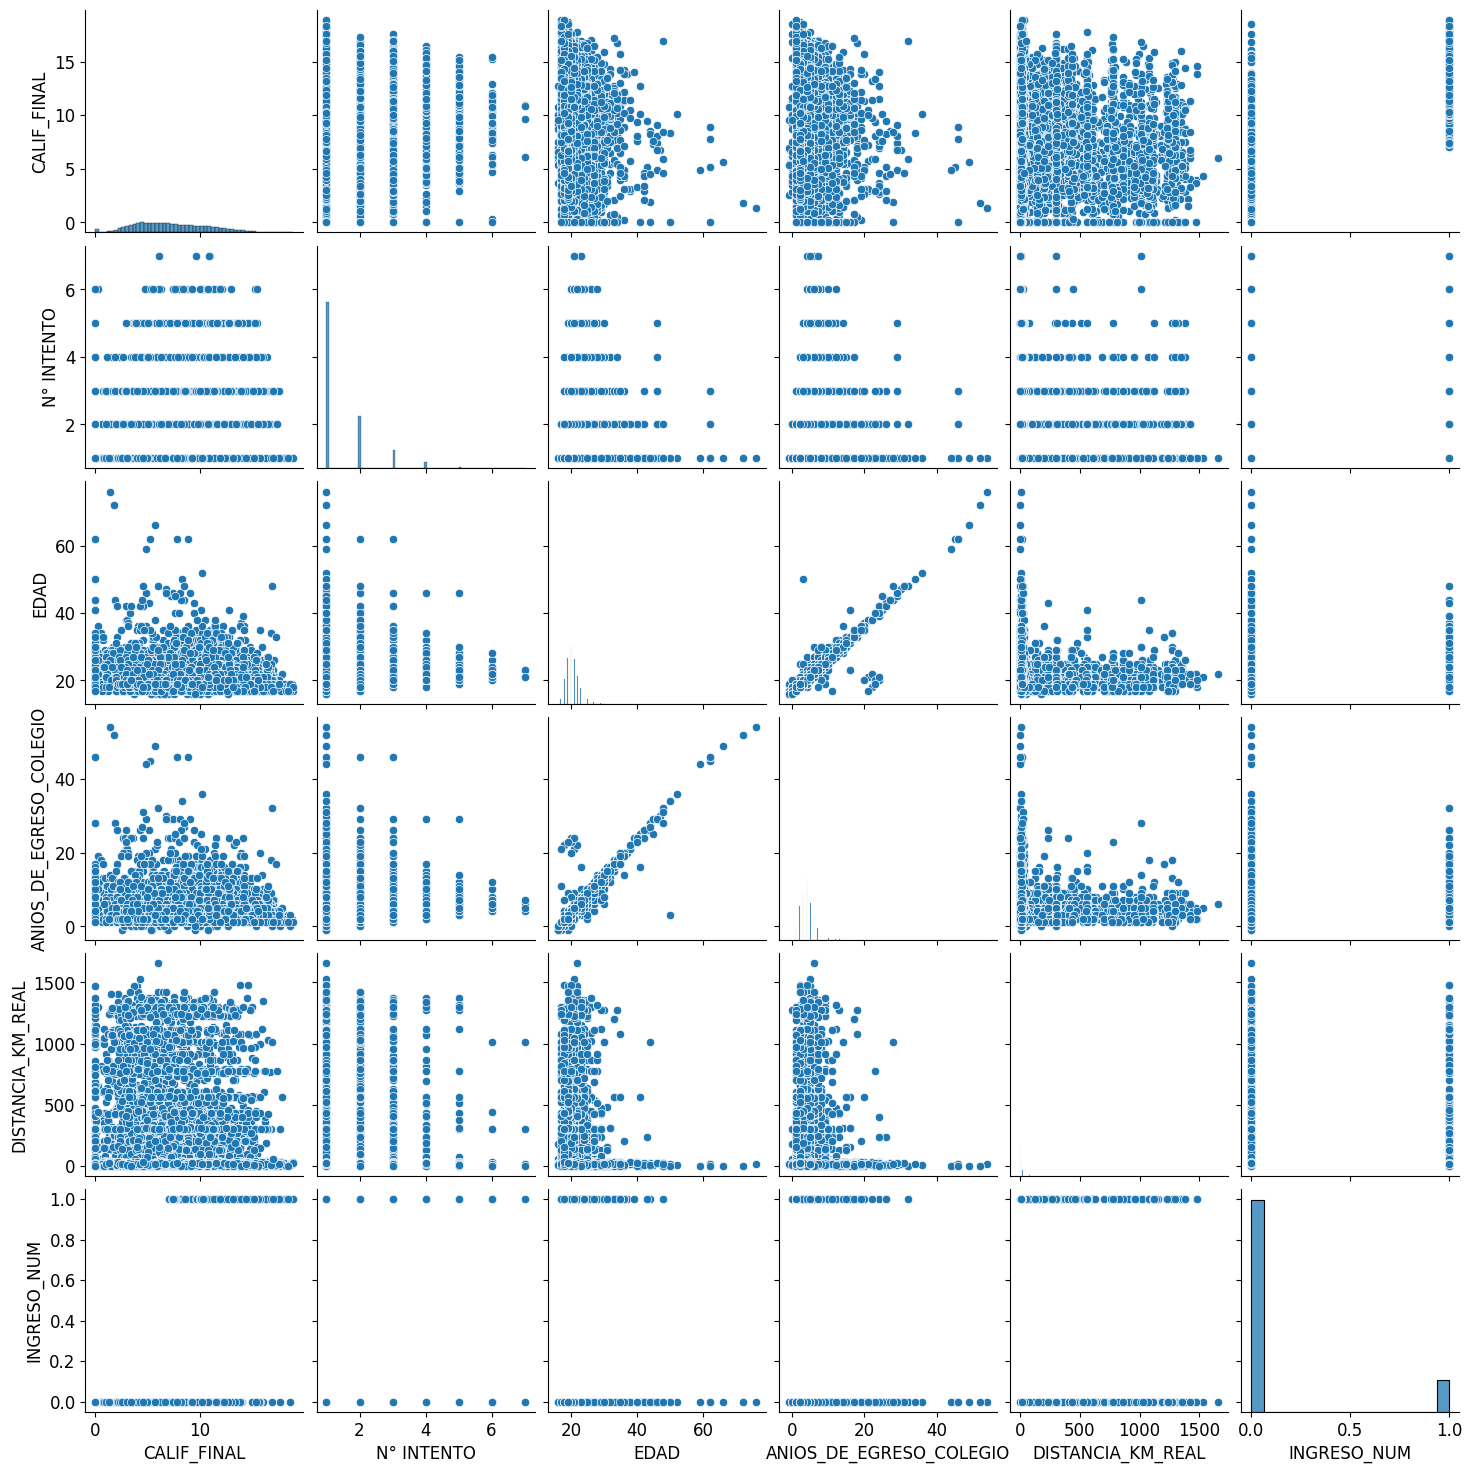

In [124]:
#Primero vamos a analizar las variables numéricas
numerical = [var for var in df.columns if df[var].dtype!='object']

#Eliminare solo para este gráfico las columnas no relevantes
df1 = df[numerical].drop(columns=['LONGITUD_DOMICILIO', 'LATITUD_DOMICILIO', 'DISTANCIA_KM','ANIO_POSTULA'])

# Crear el gráfico de dispersión de la matriz
sns.pairplot(df1)
plt.show()

#Se identifican los siguientes hallazgos:
  #POSITIVOS
  #Los años de EGRESO y la EDAD mantienen una relación directa
  #Los postulantes que tienen mayor N° intentos (N° INTENTO) son los de menor edad (EDAD)
  #Los postulantes con mayor EDAD no viven a una distancia alta (DISTANCIA_KM_REAL)

  #NEGATIVOS
  #No se registran ingresantes con edad mayor a 50 años

Se identifican los siguientes hallazgos:

**POSITIVOS**

* Los años de EGRESO y la EDAD mantienen una relación directa

* Los postulantes que tienen mayor N° intentos (N° INTENTO) son los de menor edad (EDAD)

* Los postulantes con mayor EDAD no viven a una distancia alta (DISTANCIA_KM_REAL)

**NEGATIVOS**
* No se registran ingresantes con edad mayor a 50 años

#**Análisis de variables categóricas**

In [125]:
df_categorico.describe()

,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,COLEGIO_PAIS,ESPECIALIDAD,DOMICILIO_DEPA,DOMICILIO_PROV,DOMICILIO_DIST,NACIMIENTO_PAIS,NACIMIENTO_DEPA,NACIMIENTO_PROV,NACIMIENTO_DIST,SEXO,INGRESO
count,24049,24049,24049,24049,24049,24049,24049,24049,24049,24049,24049,24049,24049,24049
unique,30,184,657,6,30,25,164,550,18,29,188,772,2,2
top,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,INGENIERIA CIVIL,LIMA,LIMA,LIMA,PERU,LIMA,LIMA,LIMA,MASCULINO,0
freq,18712,17857,2350,24043,4276,19961,19258,3081,23934,16858,16169,5470,18765,20888


In [126]:
ingreso_promedio_base = df.INGRESO_NUM.sum()/df.shape[0]*100
no_ingreso_promedio_base = 100 - ingreso_promedio_base
print('El ingreso promedio es de {}%'.format(round(ingreso_promedio_base,2)))
print('El no ingreso promedio es de {}%'.format(round(no_ingreso_promedio_base,2)))

El ingreso promedio es de 13.14%
El no ingreso promedio es de 86.86%


<ipython-input-127-e94a6b2ef300>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cuentas = df_categorico.groupby(['SEXO', 'INGRESO']).size().reset_index().pivot(columns='INGRESO', index='SEXO', values=0)


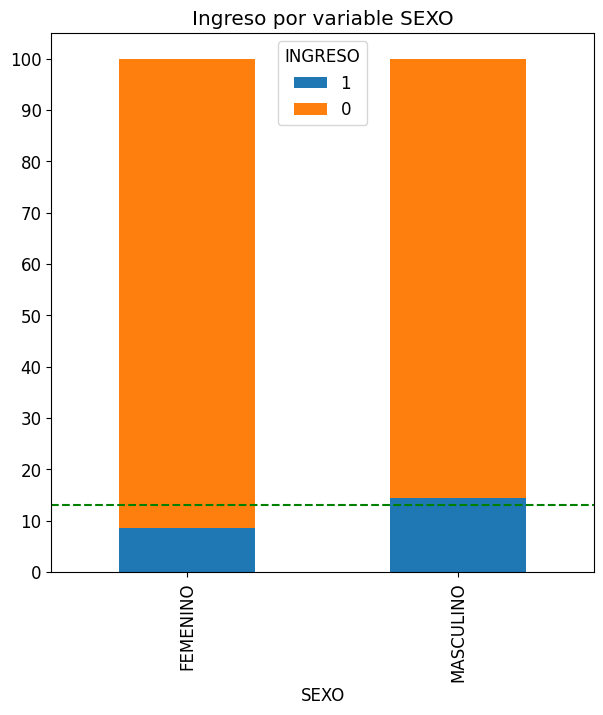

In [127]:
df_cuentas = df_categorico.groupby(['SEXO', 'INGRESO']).size().reset_index().pivot(columns='INGRESO', index='SEXO', values=0)
df_cuentas_p = df_cuentas.apply(lambda x: x*100/sum(x), axis=1)
df_cuentas_p = df_cuentas_p[[1, 0]]
df_cuentas_p.plot(kind='bar',
                  stacked=True,
                  figsize=(7,7),
                  legend=8,
                  yticks=range(0,105,10),
                  title='Ingreso por variable SEXO')
plt.axhline(ingreso_promedio_base, color='g', linestyle='--')
plt.show()

<ipython-input-128-a2075aadd34c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cuentas = df_categorico.groupby(['DOMICILIO_DEPA', 'INGRESO']).size().reset_index().pivot(columns='INGRESO', index='DOMICILIO_DEPA', values=0)


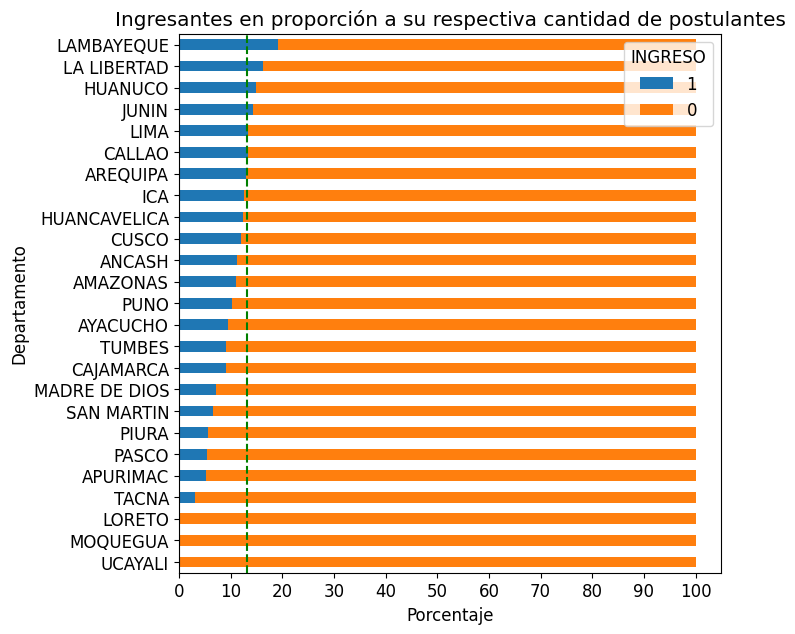

In [128]:
# Ahora se realizará el análisis por departamento de domicilio
df_cuentas = df_categorico.groupby(['DOMICILIO_DEPA', 'INGRESO']).size().reset_index().pivot(columns='INGRESO', index='DOMICILIO_DEPA', values=0)
df_cuentas_p = df_cuentas.apply(lambda x: x*100/sum(x), axis=1)
df_cuentas_p = df_cuentas_p[[1, 0]]
df_cuentas_p = df_cuentas_p.sort_values(by=1, ascending=True)
df_cuentas_p.plot(kind='barh', stacked=True, figsize=(7,7), legend=8, xticks=range(0,105,10))
plt.axvline(ingreso_promedio_base, color='g', linestyle='--')
plt.title('Ingresantes en proporción a su respectiva cantidad de postulantes')
plt.xlabel('Porcentaje')
plt.ylabel('Departamento')
plt.show()

<ipython-input-129-d202ac867fb0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cuentas = df_categorico.groupby(['DOMICILIO_DEPA', 'INGRESO']).size().reset_index().pivot(columns='INGRESO', index='DOMICILIO_DEPA', values=0)


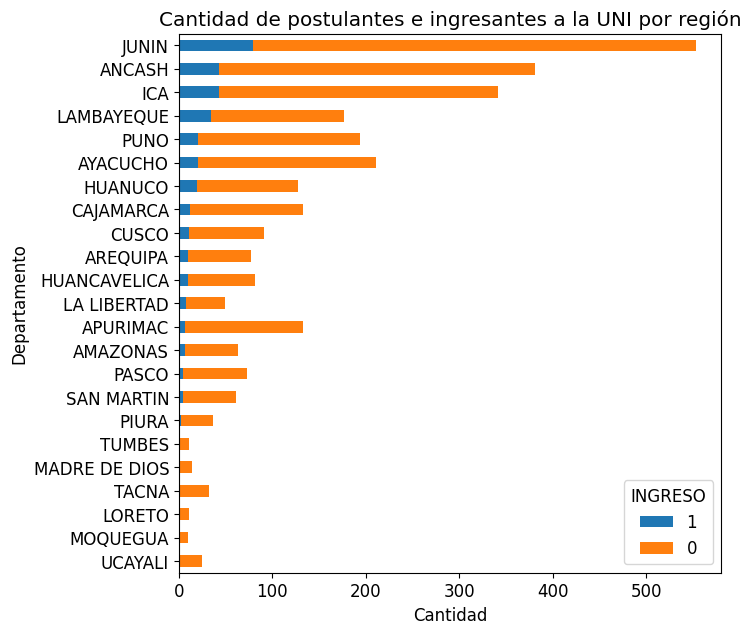

In [129]:
# Ahora se realizará el análisis por departamento de domicilio
df_cuentas = df_categorico.groupby(['DOMICILIO_DEPA', 'INGRESO']).size().reset_index().pivot(columns='INGRESO', index='DOMICILIO_DEPA', values=0)
df_cuentas = df_cuentas[[1, 0]]
df_cuentas = df_cuentas.sort_values(by=1, ascending=True)
df_cuentas = df_cuentas.iloc[:-2]
df_cuentas.plot(kind='barh', stacked=True, figsize=(7,7), legend=8)
#plt.axvline(ingreso_promedio_base, color='g', linestyle='--')
plt.title('Cantidad de postulantes e ingresantes a la UNI por región')
plt.xlabel('Cantidad')
plt.ylabel('Departamento')
plt.show()

In [130]:
df_yes = df[df['INGRESO'] == 1]
df_no = df[df['INGRESO'] == 0]
df_yes.groupby('DOMICILIO_DEPA').size().sort_values(ascending=False).head(10)

<ipython-input-130-41b12faa2d7a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_yes.groupby('DOMICILIO_DEPA').size().sort_values(ascending=False).head(10)


,0
DOMICILIO_DEPA,
LIMA,2665
CALLAO,160
JUNIN,79
ICA,43
ANCASH,43
LAMBAYEQUE,34
PUNO,20
AYACUCHO,20
HUANUCO,19


#¿La distancia hacia la universidad influye en la calificación e ingreso?

**Se procederá a hacer un análisis para encontrar patrones relacionados**

In [131]:
#Vamos a reemplazar los valores vacios en DISTANCIA_KM_REAL por su respectivo valor en DISTANCIA_KM
df['DISTANCIA_KM_REAL'] = df['DISTANCIA_KM_REAL'].fillna(df['DISTANCIA_KM'])

In [132]:
#Coeficiente de correlacion entre DISTANCIA_KM_REAL y CALIF_FINAL
#Filtrar el dataframe a solo los datos que contienen DISTANCIA_KM_REAL menor a 50 km
for i in range(0,51,5):
  a = df[df['DISTANCIA_KM_REAL'] <= i]
  correlation = a['DISTANCIA_KM_REAL'].corr(a['CALIF_FINAL'])
  print('La correlación de la nota con domicilios a distancia de ',i,' km es:',correlation)
#Nótese que no existe una correlación entre los dataset distancia y las notas, muy baja correlación

La correlación de la nota con domicilios a distancia de  0  km es: nan
La correlación de la nota con domicilios a distancia de  5  km es: 0.022144289542311492
La correlación de la nota con domicilios a distancia de  10  km es: 0.04349921793835448
La correlación de la nota con domicilios a distancia de  15  km es: 0.042198781336827994
La correlación de la nota con domicilios a distancia de  20  km es: 0.02019286411830073
La correlación de la nota con domicilios a distancia de  25  km es: 0.005438825773842507
La correlación de la nota con domicilios a distancia de  30  km es: -0.00021992661904877297
La correlación de la nota con domicilios a distancia de  35  km es: 0.0023036028640151802
La correlación de la nota con domicilios a distancia de  40  km es: 0.0023036028640151802
La correlación de la nota con domicilios a distancia de  45  km es: 0.0036030498024035205
La correlación de la nota con domicilios a distancia de  50  km es: 0.0036030498024035205


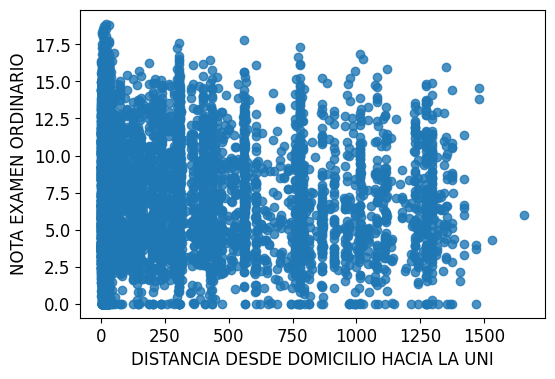

In [133]:
# Gráfico de dispersión

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df.DISTANCIA_KM_REAL, y=df.CALIF_FINAL, alpha= 0.8)
ax.set_xlabel('DISTANCIA DESDE DOMICILIO HACIA LA UNI')
ax.set_ylabel('NOTA EXAMEN ORDINARIO');
#Se visualiza una distribución sin tendencia conforme a las correlaciones

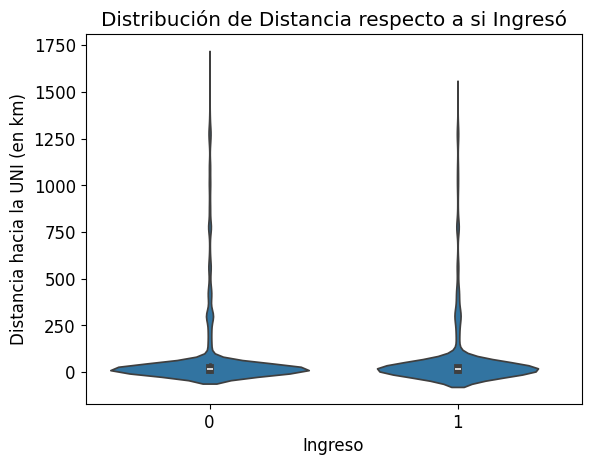

In [134]:
sns.violinplot(x='INGRESO', y='DISTANCIA_KM_REAL', data=df)
plt.title('Distribución de Distancia respecto a si Ingresó')
plt.xlabel('Ingreso')
plt.ylabel('Distancia hacia la UNI (en km)')
plt.show()
#Se concluye que la distancia en donde se domicilia no hace diferencia entre un postulante ingresa o no.

**Se verifica que la tasa de ingreso no se ve afectada por la distancia, dado que la distribución en la misma en ambos casos.**

#¿Hay suficientes postulantes de regiones alejadas geográficamente?

In [135]:
#De acuerdo al diagrama de guitarra anterior, la densidad se acumula principalmente alrededor de los 150 km.
#Por lo que se ha decidido agrupar por macroregiones a fin de contar con una diferenciación relevante.
#Vamos a definir por macroregiones a fin de reducir un poco la complejidad
macroregiones = {
    # Macroregión Norte
    'TUMBES': 'NORTE',
    'PIURA': 'NORTE',
    'LAMBAYEQUE': 'NORTE',
    'CAJAMARCA': 'NORTE',
    'LA LIBERTAD': 'NORTE',

    # Macroregión Centro

    'ANCASH': 'CENTRO',
    'JUNIN': 'CENTRO',
    'PASCO': 'CENTRO',
    'HUANUCO': 'CENTRO',
    'HUANCAVELICA': 'CENTRO',
    'AYACUCHO': 'CENTRO',
    'ICA': 'CENTRO',

    # Macroregión Sur
    'AREQUIPA': 'SUR',
    'MOQUEGUA': 'SUR',
    'TACNA': 'SUR',
    'CUSCO': 'SUR',
    'MADRE DE DIOS': 'SUR',
    'APURIMAC': 'SUR',
    'PUNO': 'SUR',

    # Macroregión Oriente
    'LORETO': 'ORIENTE',
    'UCAYALI': 'ORIENTE',
    'AMAZONAS': 'ORIENTE',
    'SAN MARTIN': 'ORIENTE',

    # Lima Metropolitana
    'CALLAO': 'LIMA',
    'LIMA': 'LIMA'  # Asegúrate de que este nombre coincida con cómo se presenta en tu DataFrame
}

# Mapear la columna de departamentos a macroregiones
df['DOMICILIO_MACROREGION'] = df['DOMICILIO_DEPA'].map(macroregiones)
df['DOMICILIO_MACROREGION'] = df['DOMICILIO_MACROREGION'].astype('category')

In [136]:
df.DOMICILIO_MACROREGION.unique()

['CENTRO', 'LIMA', 'NORTE', 'SUR', 'ORIENTE']
Categories (5, object): ['CENTRO', 'LIMA', 'NORTE', 'ORIENTE', 'SUR']

In [137]:
#Contar las filas con groupby en funcion a la columna MACROREGION
df.groupby('DOMICILIO_MACROREGION').size()

<ipython-input-137-f41ba003de78>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('DOMICILIO_MACROREGION').size()


,0
DOMICILIO_MACROREGION,
CENTRO,1768
LIMA,21164
NORTE,406
ORIENTE,160
SUR,551


**Se verifica una gran concentración de postulantes en Lima**

#Entonces, ¿la información geográfica es irrelevante?

**No necesariamente, es posible aprovechar herramientas que aprovechen la data georeferenciada y que permitan identificar patrones.**

In [138]:
#Conteo de los postulantes que "SI" ingresaron a la UNI por departamento de domicilio. Modalidad ORDINARIO
df_yes = df[df['INGRESO'] == 1]
df_yes.groupby('DOMICILIO_DEPA').size().sort_values(ascending=False).head(10)

<ipython-input-138-5c68a9b141d5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_yes.groupby('DOMICILIO_DEPA').size().sort_values(ascending=False).head(10)


,0
DOMICILIO_DEPA,
LIMA,2665
CALLAO,160
JUNIN,79
ICA,43
ANCASH,43
LAMBAYEQUE,34
PUNO,20
AYACUCHO,20
HUANUCO,19


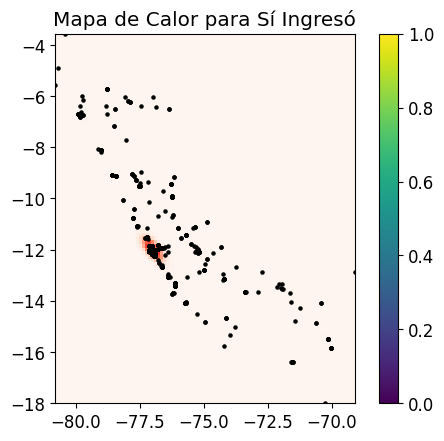

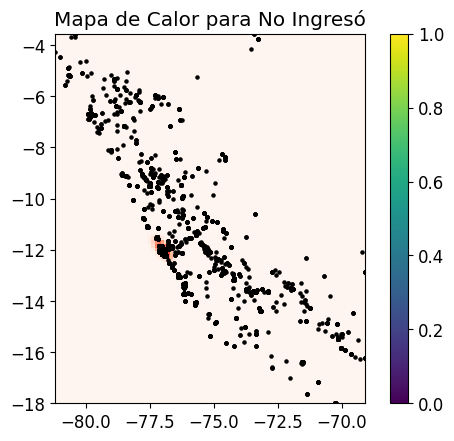

In [139]:
#No necesariamente, es posible aprovechar herramientas que aprovechen la data georeferenciada y que permitan identificar patrones.
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np



# Crear un GeoDataFrame de ejemplo
df2 = df[['LATITUD_DOMICILIO', 'LONGITUD_DOMICILIO', 'INGRESO']]

gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.LONGITUD_DOMICILIO, df2.LATITUD_DOMICILIO))

# Filtrar datos por categoría dicotómica
gdf_yes = gdf[gdf['INGRESO'] == 1]
gdf_no = gdf[gdf['INGRESO'] == 0]

# Crear un mapa de calor para la categoría 'sí'
def plot_heatmap(gdf, title):
    xy = np.vstack([gdf.geometry.x, gdf.geometry.y])
    kde = gaussian_kde(xy)
    xmin, ymin, xmax, ymax = gdf.total_bounds
    x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([x.ravel(), y.ravel()])
    z = np.reshape(kde(positions).T, x.shape)

    plt.imshow(np.rot90(z), cmap='Reds', extent=[xmin, xmax, ymin, ymax])
    plt.scatter(gdf.geometry.x, gdf.geometry.y, c='black', s=5)
    plt.title(title)
    plt.colorbar()
    plt.show()

plot_heatmap(gdf_yes, 'Mapa de Calor para Sí Ingresó')
plot_heatmap(gdf_no, 'Mapa de Calor para No Ingresó')

In [140]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Crear un DataFrame de ejemplo
df3 = df[['LATITUD_DOMICILIO', 'LONGITUD_DOMICILIO', 'INGRESO']]

# Crear el mapa base
m = folium.Map(location=[df3['LATITUD_DOMICILIO'].mean(), df3['LONGITUD_DOMICILIO'].mean()], zoom_start=4)

# Filtrar datos por categoría dicotómica
df_yes = df3[df3['INGRESO'] == 1]
df_no = df3[df3['INGRESO'] == 0]

# Crear el mapa de calor para la categoría 'sí'
HeatMap(df_yes[['LATITUD_DOMICILIO', 'LONGITUD_DOMICILIO']].values.tolist(), name='Sí').add_to(m)

# Opcional: Puedes añadir también un mapa de calor para la categoría 'no'
HeatMap(df_no[['LATITUD_DOMICILIO', 'LONGITUD_DOMICILIO']].values.tolist(), name='No').add_to(m)

# Añadir una capa de control
folium.LayerControl().add_to(m)

# Guardar el mapa en un archivo HTML
m.save('heatmap.html')

#A continuación, se visualiza el mapa de calor del Perú con los de los postulantes que "SI" ingresaron a la UNI

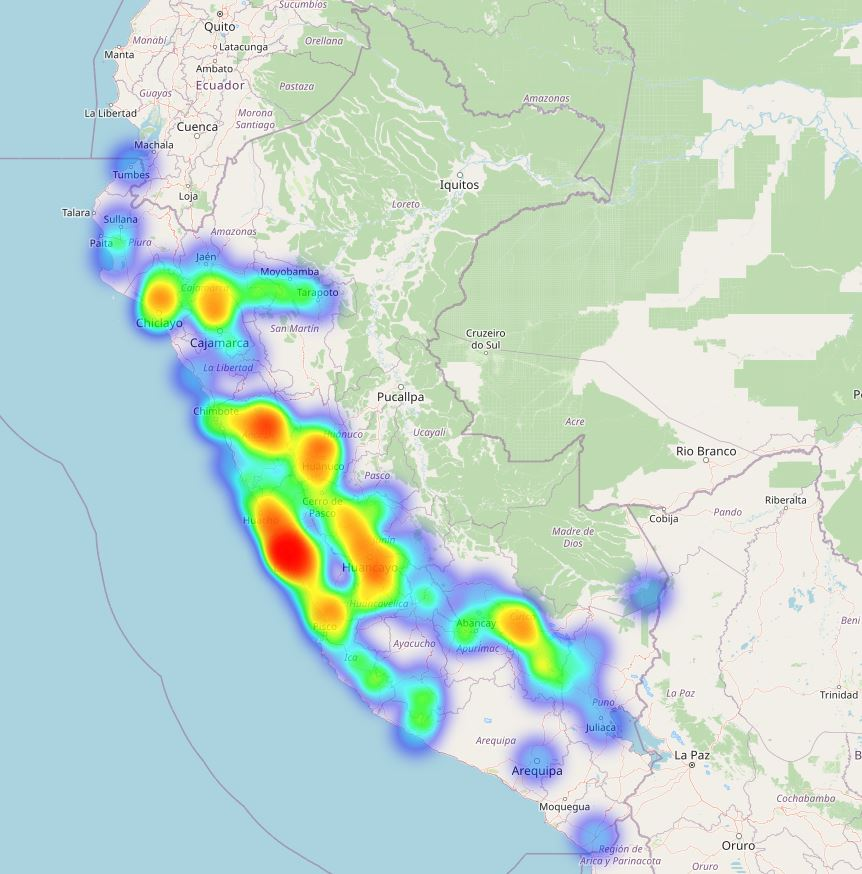

#ETAPA 2: ANÁLISIS DE LAS VARIABLES RELEVANTES PARA EL MODELO


In [141]:
#A partir de ahora empezaremos a selecionar variables que puedan ayudar a predecir en mejor medida el ingreso o no a la UNI
#Mostraremos los titulos de las columnas del dataframe df
df.columns

Index(['COLEGIO_DEPA', 'COLEGIO_PROV', 'COLEGIO_DIST', 'COLEGIO_PAIS',
       'ESPECIALIDAD', 'ANIO_POSTULA', 'DOMICILIO_DEPA', 'DOMICILIO_PROV',
       'DOMICILIO_DIST', 'NACIMIENTO_PAIS', 'NACIMIENTO_DEPA',
       'NACIMIENTO_PROV', 'NACIMIENTO_DIST', 'SEXO', 'CALIF_FINAL', 'INGRESO',
       'N° INTENTO', 'EDAD', 'ANIOS_DE_EGRESO_COLEGIO', 'LONGITUD_DOMICILIO',
       'LATITUD_DOMICILIO', 'DISTANCIA_KM', 'DISTANCIA_KM_REAL', 'INGRESO_NUM',
       'DOMICILIO_MACROREGION'],
      dtype='object')

In [142]:
##Evaluación de las variables que no se considerarán dentro del modelo

#Se omite información respecto a los colegios por la alta variabilidad
#Asimismo, en el análisis gráfico se pudo evidenciar que casi todos los registros provienen de Perú
#COLEGIO_DEPA
#COLEGIO_PROV
#COLEGIO_DIST
#COLEGIO PAIS

#Se omite información del lugar del domicilio por la alta variabilidad
#Sin embargo, se ha reducido el impacto del mismo con 2 nuevas variables: DISTANCIA_KM_REAL y MACROREGION
#DOMICILIO_DEPA
#DOMICILIO_PROV
#DOMICILIO_DIST

#Se omite información del lugar de nacimiento para el modelo por la alta variabilidad
#Sin embargo, esta información puede ser impactante en una visualización geográfica
#NACIMIENTO_PAIS
#NACIMIENTO_DEPA
#NACIMIENTO_PROV
#NACIMIENTO_DIST

#La longitud y latitud se utilizaron para crear la variable DISTANCIA_KM y DISTANCIA_KM_REAL
#Pero DISTANCIA_KM no es preciso por lo que tambien se eliminó, y se optó por una distancia real con una API de gmaps (DISTANCIA_KM_REAL)
#LONGITUD_DOMICILIO
#LATITUD_DOMICILIO
#DISTANCIA_KM

#Se omite información por alta variabilidad
#ESPECIALIDAD
#ANIO_POSTULA

In [143]:
#Crear un nuevo dataframe sin las variables antes descritas.
df_modelo = df.drop(columns=['COLEGIO_DEPA', 'COLEGIO_PROV', 'COLEGIO_DIST', 'COLEGIO_PAIS',
                             'DOMICILIO_DEPA', 'DOMICILIO_PROV', 'DOMICILIO_DIST',
                             'NACIMIENTO_PAIS', 'NACIMIENTO_DEPA', 'NACIMIENTO_PROV', 'NACIMIENTO_DIST',
                             'LONGITUD_DOMICILIO', 'LATITUD_DOMICILIO', 'DISTANCIA_KM', 'ESPECIALIDAD',
                             'DISTANCIA_KM_REAL','ANIO_POSTULA','INGRESO_NUM'])

In [144]:
df_modelo.head()

,SEXO,CALIF_FINAL,INGRESO,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DOMICILIO_MACROREGION
0,FEMENINO,3.58,0,1,23,7,CENTRO
1,MASCULINO,8.04,0,1,24,8,LIMA
2,FEMENINO,6.21,0,1,20,4,LIMA
3,MASCULINO,4.45,0,1,22,5,LIMA
4,FEMENINO,5.97,0,1,25,9,LIMA


In [145]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24049 entries, 0 to 24048
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   SEXO                     24049 non-null  category
 1   CALIF_FINAL              24049 non-null  float64 
 2   INGRESO                  24049 non-null  category
 3   N° INTENTO               24049 non-null  int64   
 4   EDAD                     24049 non-null  int64   
 5   ANIOS_DE_EGRESO_COLEGIO  24049 non-null  int64   
 6   DOMICILIO_MACROREGION    24049 non-null  category
dtypes: category(3), float64(1), int64(3)
memory usage: 822.6 KB


In [146]:
#Vamos a reemplazar la columna INGRESO, donde 0 será NO y 1 será SI
df_modelo['INGRESO'] = df_modelo['INGRESO'].replace({0: 'NO', 1: 'SI'})
df_modelo.head()

,SEXO,CALIF_FINAL,INGRESO,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DOMICILIO_MACROREGION
0,FEMENINO,3.58,NO,1,23,7,CENTRO
1,MASCULINO,8.04,NO,1,24,8,LIMA
2,FEMENINO,6.21,NO,1,20,4,LIMA
3,MASCULINO,4.45,NO,1,22,5,LIMA
4,FEMENINO,5.97,NO,1,25,9,LIMA


#INGRESO DE DATOS

In [147]:
#Ver las dimensiones del dataframe
df_modelo.shape

(24049, 7)

In [148]:
#Verificamos un resumen del dataframe
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24049 entries, 0 to 24048
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   SEXO                     24049 non-null  category
 1   CALIF_FINAL              24049 non-null  float64 
 2   INGRESO                  24049 non-null  category
 3   N° INTENTO               24049 non-null  int64   
 4   EDAD                     24049 non-null  int64   
 5   ANIOS_DE_EGRESO_COLEGIO  24049 non-null  int64   
 6   DOMICILIO_MACROREGION    24049 non-null  category
dtypes: category(3), float64(1), int64(3)
memory usage: 822.6 KB


##Análisis de las variables categóricas

In [149]:
#Buscaremos las variables categoricas
categorica = [var for var in df_modelo.columns if df_modelo[var].dtype=='category']

print('Hay {} variables categóricas\n'.format(len(categorica)))

print('Las variables categóricas son :', categorica)

Hay 3 variables categóricas

Las variables categóricas son : ['SEXO', 'INGRESO', 'DOMICILIO_MACROREGION']


In [150]:
#Revisaremos los valores perdidos de las variables categoricas
df[categorica].isnull().sum()

,0
SEXO,0
INGRESO,0
DOMICILIO_MACROREGION,0


In [151]:
#Mostrar las frecuencias de las variables categoricas
for var in categorica:
    print(df_modelo[var].value_counts())

SEXO
MASCULINO    18765
FEMENINO      5284
Name: count, dtype: int64
INGRESO
NO    20888
SI     3161
Name: count, dtype: int64
DOMICILIO_MACROREGION
LIMA       21164
CENTRO      1768
SUR          551
NORTE        406
ORIENTE      160
Name: count, dtype: int64


In [152]:
#Mostrar la frecuencia de las variables categóricas
for var in categorica:
    print(df_modelo[var].value_counts()/float(len(df_modelo)))

SEXO
MASCULINO    0.780282
FEMENINO     0.219718
Name: count, dtype: float64
INGRESO
NO    0.86856
SI    0.13144
Name: count, dtype: float64
DOMICILIO_MACROREGION
LIMA       0.880037
CENTRO     0.073517
SUR        0.022912
NORTE      0.016882
ORIENTE    0.006653
Name: count, dtype: float64


In [153]:
#Comprobar la cardinalidad de las variables categóricas (Cantidad de opciones)
#Una cardinalidad muy alta perjudica a la complejidad
for var in categorica:
    print(var, ' contains ', len(df_modelo[var].unique()), ' labels')

SEXO  contains  2  labels
INGRESO  contains  2  labels
DOMICILIO_MACROREGION  contains  5  labels


In [154]:
#Exploramos la variable SEXO. Se usa el "One Hot Encoding" para obtener k-1, además una columna extra para los Na
pd.get_dummies(df_modelo.SEXO, drop_first=True, dummy_na=True).head()

,MASCULINO,NaN
0,False,False
1,True,False
2,False,False
3,True,False
4,False,False


In [155]:
#Exploramos la variable MACROREGION. Se usa el "One Hot Encoding" para obtener k-1, además una columna extra para los Na
pd.get_dummies(df_modelo.DOMICILIO_MACROREGION, drop_first=True, dummy_na=True).head()

,LIMA,NORTE,ORIENTE,SUR,NaN
0,False,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


In [156]:
#Exploramos la variable INGRESO. Se usa el "One Hot Encoding" para obtener k-1, además una columna extra para los Na
pd.get_dummies(df_modelo.INGRESO, drop_first=True, dummy_na=True).head()

,SI,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


##Análisis de las variables numéricas

In [157]:
#Detectemos cuales son las variables numéricas

numerico = [var for var in df_modelo.columns if df_modelo[var].dtype!='object']
print('Hay {} variables numéricas\n'.format(len(numerico)))
print('Las variables numéricas son :', numerico)

Hay 7 variables numéricas

Las variables numéricas son : ['SEXO', 'CALIF_FINAL', 'INGRESO', 'N° INTENTO', 'EDAD', 'ANIOS_DE_EGRESO_COLEGIO', 'DOMICILIO_MACROREGION']


In [158]:
#Visualizar solo las variables numéricas
df_modelo[numerico].head()

,SEXO,CALIF_FINAL,INGRESO,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DOMICILIO_MACROREGION
0,FEMENINO,3.58,NO,1,23,7,CENTRO
1,MASCULINO,8.04,NO,1,24,8,LIMA
2,FEMENINO,6.21,NO,1,20,4,LIMA
3,MASCULINO,4.45,NO,1,22,5,LIMA
4,FEMENINO,5.97,NO,1,25,9,LIMA


In [159]:
#Revisamos los valores nulos del dataframe
df_modelo[numerico].isnull().sum()

,0
SEXO,0
CALIF_FINAL,0
INGRESO,0
N° INTENTO,0
EDAD,0
ANIOS_DE_EGRESO_COLEGIO,0
DOMICILIO_MACROREGION,0


In [160]:
#Revisamos un resumen estadístico de las variables numéricas
round(df_modelo[numerico].describe(),2)
#Nótese que se encuentran variables con posibles outliers

,CALIF_FINAL,N° INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO
count,24049.00,24049.00,24049.00,24049.00
mean,7.38,1.47,20.71,4.36
std,3.44,0.81,2.56,2.55
min,0.00,1.00,16.00,-1.00
25%,4.71,1.00,19.00,3.00
50%,7.00,1.00,20.00,4.00
75%,9.88,2.00,22.00,5.00
max,18.90,7.00,76.00,54.00


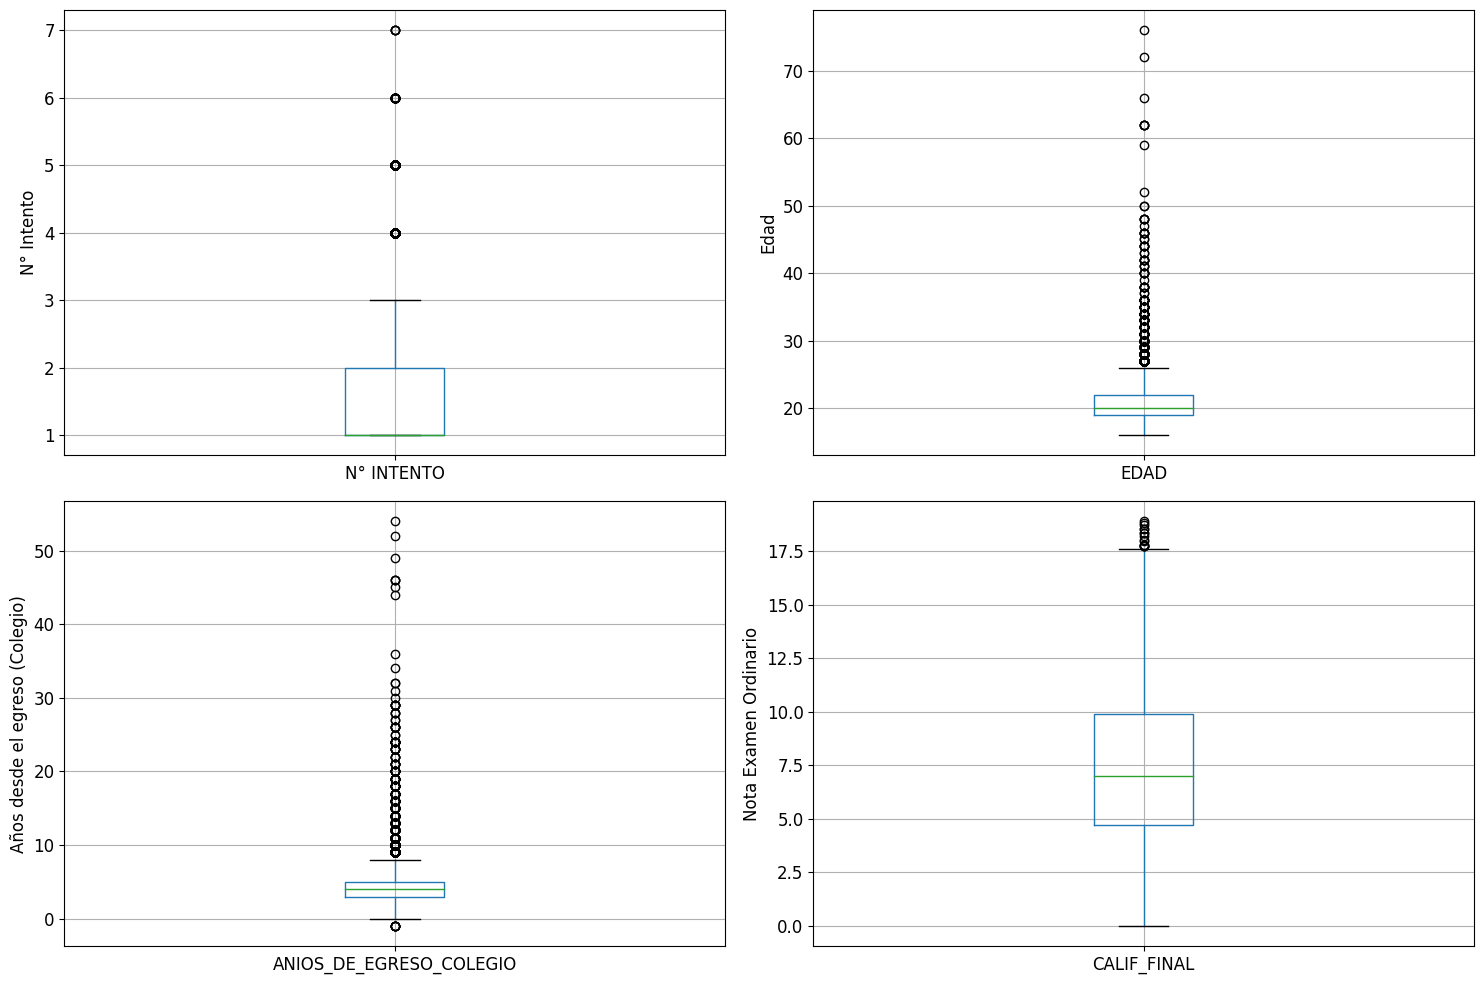

In [163]:
#Graficamos los gráficos de  cajas referentes a las variables con posibles Outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df_modelo.boxplot(column='N° INTENTO')
fig.set_title('')
fig.set_ylabel('N° Intento')


plt.subplot(2, 2, 2)
fig = df_modelo.boxplot(column='EDAD')
fig.set_title('')
fig.set_ylabel('Edad')


plt.subplot(2, 2, 3)
fig = df_modelo.boxplot(column='ANIOS_DE_EGRESO_COLEGIO')
fig.set_title('')
fig.set_ylabel('Años desde el egreso (Colegio)')


plt.subplot(2, 2, 4)
fig = df_modelo.boxplot(column='CALIF_FINAL')
fig.set_title('')
fig.set_ylabel('Nota Examen Ordinario')


plt.tight_layout()

In [47]:
#Renombrar la columna de la columna N° INTENTO a N_INTENTO
df_modelo.rename(columns={'N° INTENTO': 'N_INTENTO'}, inplace=True)

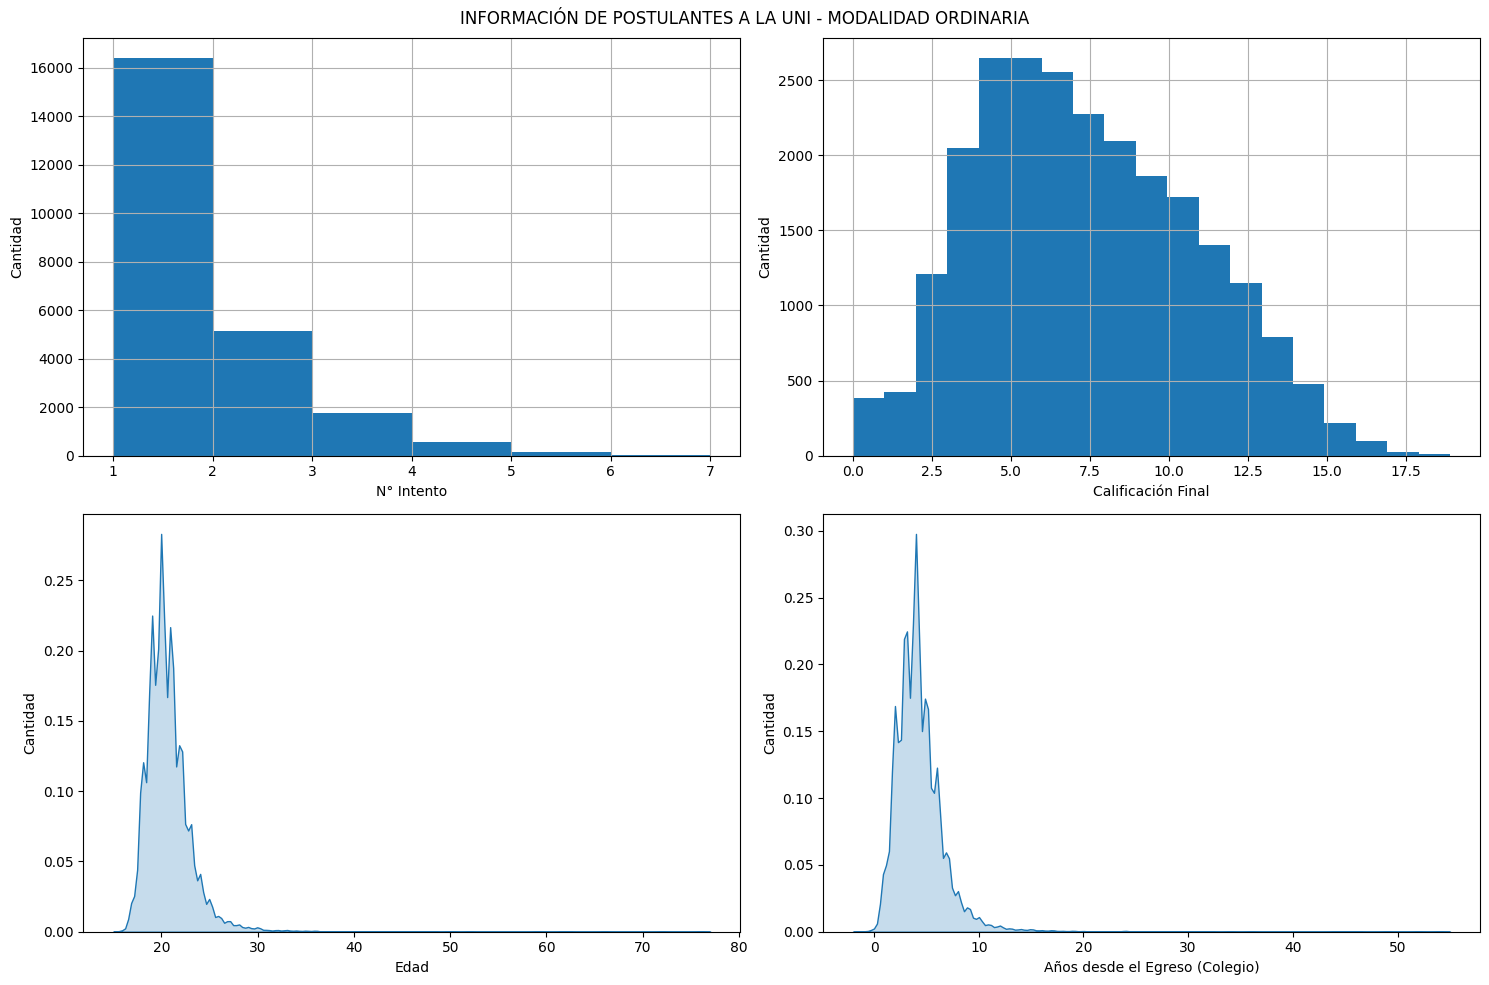

In [48]:
#Visualizamos la distribución (GENERAL)
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df_modelo.N_INTENTO.hist(bins=6)
fig.set_xlabel('N° Intento')
fig.set_ylabel('Cantidad')

plt.subplot(2, 2, 2)
fig = df_modelo.CALIF_FINAL.hist(bins=19)
fig.set_xlabel('Calificación Final')
fig.set_ylabel('Cantidad')

plt.subplot(2, 2, 3)
sns.kdeplot(df_modelo['EDAD'], fill=True)
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.subplot(2, 2, 4)
sns.kdeplot(df_modelo['ANIOS_DE_EGRESO_COLEGIO'], fill=True)
plt.xlabel('Años desde el Egreso (Colegio)')
plt.ylabel('Cantidad')

plt.suptitle('INFORMACIÓN DE POSTULANTES A LA UNI - MODALIDAD ORDINARIA')

plt.tight_layout()

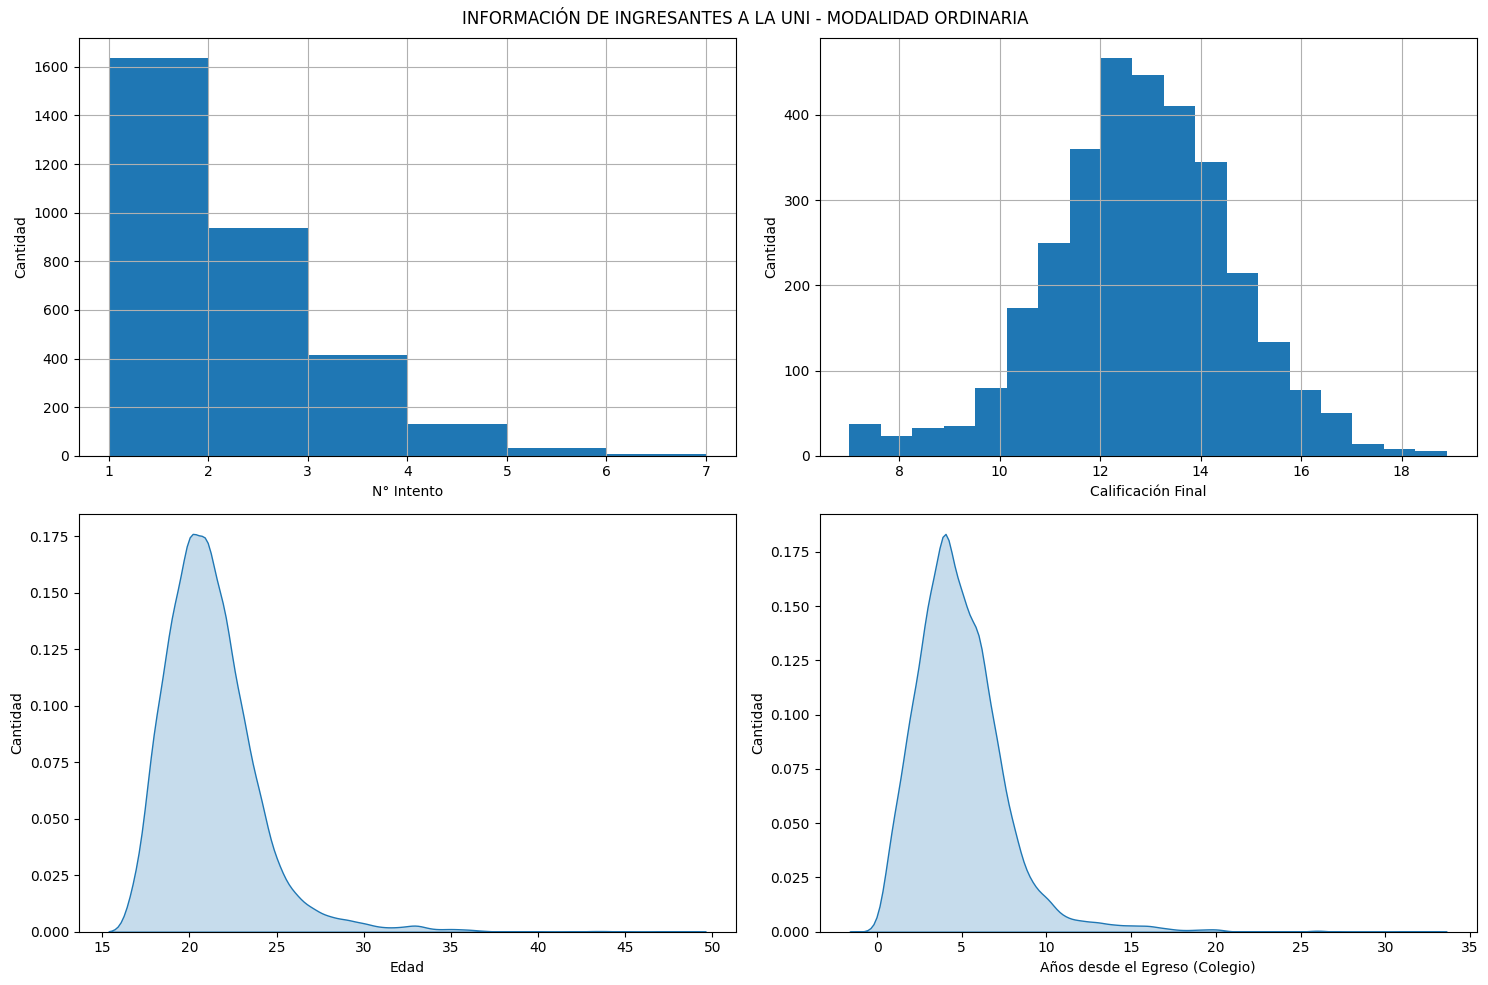

In [49]:
#Visualizamos la distribución (GENERAL) - SOLO LOS QUE SI LOGRARON INGRESAR

#Obtener un dataframe filtrado solo con los registrso de los casos que tienen INGRESO = 'SI'
a = df_modelo[df_modelo['INGRESO'] == 'SI']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = a.N_INTENTO.hist(bins=6)
fig.set_xlabel('N° Intento')
fig.set_ylabel('Cantidad')

plt.subplot(2, 2, 2)
fig = a.CALIF_FINAL.hist(bins=19)
fig.set_xlabel('Calificación Final')
fig.set_ylabel('Cantidad')

plt.subplot(2, 2, 3)
sns.kdeplot(a['EDAD'], fill=True)
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.subplot(2, 2, 4)
sns.kdeplot(a['ANIOS_DE_EGRESO_COLEGIO'], fill=True)
plt.xlabel('Años desde el Egreso (Colegio)')
plt.ylabel('Cantidad')

plt.suptitle('INFORMACIÓN DE INGRESANTES A LA UNI - MODALIDAD ORDINARIA')

plt.tight_layout()

##Análisis de los Outliers

In [50]:
#Encontramos los outliers de la variable N° INTENTO (3*IQR = Atípico Extremo)

IQR = df_modelo.N_INTENTO.quantile(0.75) - df_modelo.N_INTENTO.quantile(0.25)
Lower_fence = df_modelo.N_INTENTO.quantile(0.25) - (IQR * 3)
Upper_fence = df_modelo.N_INTENTO.quantile(0.75) + (IQR * 3)
print('Los outliers para N_INTENTO son < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Los outliers para N_INTENTO son < -2.0 or > 5.0


In [51]:
#Encontramos los outliers de la variable EDAD (3*IQR = Atípico Extremo)

IQR = df_modelo.EDAD.quantile(0.75) - df_modelo.EDAD.quantile(0.25)
Lower_fence = df_modelo.EDAD.quantile(0.25) - (IQR * 3)
Upper_fence = df_modelo.EDAD.quantile(0.75) + (IQR * 3)
print('Los outliers para EDAD son < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Los outliers para EDAD son < 10.0 or > 31.0


In [52]:
#Encontramos los outliers de la variable ANIOS_DE_EGRESO_COLEGIO (3*IQR = Atípico Extremo)

IQR = df_modelo.ANIOS_DE_EGRESO_COLEGIO.quantile(0.75) - df_modelo.ANIOS_DE_EGRESO_COLEGIO.quantile(0.25)
Lower_fence = df_modelo.ANIOS_DE_EGRESO_COLEGIO.quantile(0.25) - (IQR * 3)
Upper_fence = df_modelo.ANIOS_DE_EGRESO_COLEGIO.quantile(0.75) + (IQR * 3)
print('Los outliers para ANIOS_DE_EGRESO_COLEGIO son < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Los outliers para ANIOS_DE_EGRESO_COLEGIO son < -3.0 or > 11.0


In [53]:
#Encontramos los outliers de la variable DISTANCIA_KM_REAL (3*IQR = Atípico Extremo)

IQR = df_modelo.CALIF_FINAL.quantile(0.75) - df_modelo.CALIF_FINAL.quantile(0.25)
Lower_fence = df_modelo.CALIF_FINAL.quantile(0.25) - (IQR * 3)
Upper_fence = df_modelo.CALIF_FINAL.quantile(0.75) + (IQR * 3)
print('Los outliers para CALIF_FINAL son < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

#No es necesario hacer recorte por Outliers dado que esta dentro del rango [0,20]

Los outliers para CALIF_FINAL son < -10.812000000000001 or > 25.406000000000002


##Declaramos cuales son las variables dependientes e independientes

In [54]:
X = df_modelo.drop(['INGRESO'], axis=1)
y = df_modelo['INGRESO']

##Separamos la data en entrenamiento y testeo

In [55]:
# Dividimos X , y con una proporción de 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
X_train.shape, X_test.shape

((19239, 6), (4810, 6))

In [57]:
X_train.dtypes

,0
SEXO,category
CALIF_FINAL,float64
N_INTENTO,int64
EDAD,int64
ANIOS_DE_EGRESO_COLEGIO,int64
DOMICILIO_MACROREGION,category


##Ingeniería de caracteristicas

In [58]:
#Muestra todas las variables del entrenamiento
X_train.dtypes

,0
SEXO,category
CALIF_FINAL,float64
N_INTENTO,int64
EDAD,int64
ANIOS_DE_EGRESO_COLEGIO,int64
DOMICILIO_MACROREGION,category


In [59]:
#Muestra las variables del categorico
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'category']
categorical

['SEXO', 'DOMICILIO_MACROREGION']

In [60]:
#Muestra las variables de los numéricos
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'category']
numerical

['CALIF_FINAL', 'N_INTENTO', 'EDAD', 'ANIOS_DE_EGRESO_COLEGIO']

In [61]:
#Checkeo de los valores nulos
X_train.isnull().sum()

,0
SEXO,0
CALIF_FINAL,0
N_INTENTO,0
EDAD,0
ANIOS_DE_EGRESO_COLEGIO,0
DOMICILIO_MACROREGION,0


##Codificar las variables numéricas (Outliers)

In [62]:
#Checkeo de los outliers en variables numéricas
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['N_INTENTO'] = max_value(df3, 'N_INTENTO', 5)
    df3['EDAD'] = max_value(df3, 'EDAD', 31)
    df3['ANIOS_DE_EGRESO_COLEGIO'] = max_value(df3, 'ANIOS_DE_EGRESO_COLEGIO', 11)

In [63]:
X_train[numerical].describe()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO
count,19239.000000,19239.000000,19239.000000,19239.000000
mean,7.376307,1.460315,20.678622,4.281044
std,3.447387,0.797629,2.233206,2.052606
min,0.000000,1.000000,16.000000,-1.000000
25%,4.709500,1.000000,19.000000,3.000000
50%,6.991000,1.000000,20.000000,4.000000
75%,9.864500,2.000000,22.000000,5.000000
max,18.895000,5.000000,31.000000,11.000000


##Codificar variables categóricas

In [64]:
X_train[categorical].head()

,SEXO,DOMICILIO_MACROREGION
10568,MASCULINO,LIMA
2133,MASCULINO,LIMA
11874,MASCULINO,LIMA
9018,MASCULINO,LIMA
660,MASCULINO,CENTRO


In [65]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [66]:
# encode INGRESO variable
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['SEXO'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [67]:
X_train.head()

,SEXO_0,SEXO_1,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,DOMICILIO_MACROREGION
10568,0,1,12.190,3,21,4,LIMA
2133,0,1,8.080,1,21,5,LIMA
11874,0,1,13.322,3,21,5,LIMA
9018,0,1,14.400,2,20,4,LIMA
660,0,1,9.320,1,21,5,CENTRO


In [68]:
####
X_train = pd.concat([X_train[numerical], X_train[['SEXO_0', 'SEXO_1']],
                     pd.get_dummies(X_train.DOMICILIO_MACROREGION)], axis=1)

In [69]:
X_train.head()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,SEXO_0,SEXO_1,CENTRO,LIMA,NORTE,ORIENTE,SUR
10568,12.190,3,21,4,0,1,False,True,False,False,False
2133,8.080,1,21,5,0,1,False,True,False,False,False
11874,13.322,3,21,5,0,1,False,True,False,False,False
9018,14.400,2,20,4,0,1,False,True,False,False,False
660,9.320,1,21,5,0,1,True,False,False,False,False


In [70]:
#Similar creamos el test set
X_test = pd.concat([X_test[numerical], X_test[['SEXO_0', 'SEXO_1']],
                    pd.get_dummies(X_test.DOMICILIO_MACROREGION)], axis=1)

In [71]:
X_test.head()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,SEXO_0,SEXO_1,CENTRO,LIMA,NORTE,ORIENTE,SUR
16943,7.329,1,21,5,0,1,False,True,False,False,False
3101,5.360,1,20,4,0,1,False,False,True,False,False
22081,11.485,1,18,2,0,1,False,True,False,False,False
18417,6.981,4,20,4,0,1,False,True,False,False,False
23433,15.976,1,17,1,0,1,False,True,False,False,False


#ESCALADO DE LAS VARIABLES

In [72]:
X_train.describe()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,SEXO_0,SEXO_1
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,7.376307,1.460315,20.678622,4.281044,0.222049,0.777951
std,3.447387,0.797629,2.233206,2.052606,0.415635,0.415635
min,0.000000,1.000000,16.000000,-1.000000,0.000000,0.000000
25%,4.709500,1.000000,19.000000,3.000000,0.000000,1.000000
50%,6.991000,1.000000,20.000000,4.000000,0.000000,1.000000
75%,9.864500,2.000000,22.000000,5.000000,0.000000,1.000000
max,18.895000,5.000000,31.000000,11.000000,1.000000,1.000000


In [73]:
cols = X_train.columns

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,CALIF_FINAL,N_INTENTO,EDAD,ANIOS_DE_EGRESO_COLEGIO,SEXO_0,SEXO_1,CENTRO,LIMA,NORTE,ORIENTE,SUR
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,0.390384,0.115079,0.311908,0.440087,0.222049,0.777951,0.073497,0.878944,0.017465,0.006653,0.023442
std,0.182450,0.199407,0.148880,0.171051,0.415635,0.415635,0.260957,0.326201,0.130998,0.081297,0.151306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249246,0.000000,0.200000,0.333333,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.369992,0.000000,0.266667,0.416667,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.522069,0.250000,0.400000,0.500000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#ETAPA 3: MODELO DE REGRESIÓN LOGÍSTICA

#REGRESIÓN LOGÍSTICA (ENTRENAMIENTO DE MODELO)

In [76]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0,class_weight='balanced')

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

#REGRESION LOGÍSTICA (PREDECIR RESULTADOS)

In [77]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['NO', 'NO', 'SI', ..., 'NO', 'NO', 'NO'], dtype=object)

In [78]:
# probability of getting output as 0 - no ingresar

logreg.predict_proba(X_test)[:,0]

array([0.94736006, 0.99376745, 0.28241558, ..., 0.99621242, 0.99930506,
       0.93722423])

In [79]:
# probability of getting output as 1 - ingresar

logreg.predict_proba(X_test)[:,1]

array([5.26399394e-02, 6.23255265e-03, 7.17584418e-01, ...,
       3.78758045e-03, 6.94942297e-04, 6.27757660e-02])

#REGRESIÓN LOGÍSTICA (MEDICIÓN DE PRECISIÓN)

In [80]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8871


In [81]:
#Comparar
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['SI', 'NO', 'SI', ..., 'NO', 'NO', 'NO'], dtype=object)

In [82]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8841


In [83]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8841
Test set score: 0.8871


In [84]:
####### C = 100
#Incrementando el valor de C, volvemos más flexible el modelo

# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0,class_weight='balanced')


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced', random_state=0,
                   solver='liblinear')

In [85]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8865
Test set score: 0.8879


In [86]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0,class_weight='balanced')


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=0,
                   solver='liblinear')

In [87]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8486
Test set score: 0.8497


In [88]:
### NULL ACCURACY
# check class distribution in test set

y_test.value_counts()

,count
INGRESO,
NO,4165
SI,645


In [89]:
# check null accuracy score

null_accuracy = (4165/(4165+645))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8659


## MATRIZ DE CONFUSION

In [90]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3668  497]
 [  46  599]]

True Positives(TP) =  3668

True Negatives(TN) =  599

False Positives(FP) =  497

False Negatives(FN) =  46


<Axes: >

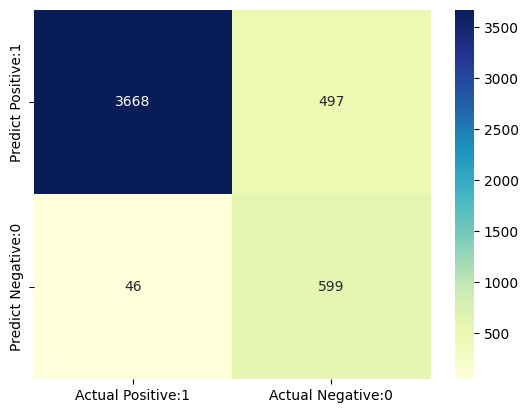

In [91]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#METRICAS DE CLASIFICACION

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          NO       0.99      0.88      0.93      4165
          SI       0.55      0.93      0.69       645

    accuracy                           0.89      4810
   macro avg       0.77      0.90      0.81      4810
weighted avg       0.93      0.89      0.90      4810



In [93]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [94]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

#Sensitivity
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#True positive rate
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

#False positive rate
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specifitivity
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.8871
Classification error : 0.1129
Precision : 0.8807
Recall or Sensitivity : 0.9876
True Positive Rate : 0.9876
False Positive Rate : 0.4535
Specificity : 0.5465


#Ajustar el nivel de umbral

In [95]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.94736006, 0.05263994],
       [0.99376745, 0.00623255],
       [0.28241558, 0.71758442],
       [0.95648371, 0.04351629],
       [0.0050832 , 0.9949168 ],
       [0.9397093 , 0.0602907 ],
       [0.5491502 , 0.4508498 ],
       [0.49712537, 0.50287463],
       [0.62497232, 0.37502768],
       [0.99467458, 0.00532542]])

In [96]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Ingresar (0)', 'Prob of - Ingresar (1)'])

y_pred_prob_df

,Prob of - No Ingresar (0),Prob of - Ingresar (1)
0,0.947360,0.052640
1,0.993767,0.006233
2,0.282416,0.717584
3,0.956484,0.043516
4,0.005083,0.994917
5,0.939709,0.060291
6,0.549150,0.450850
7,0.497125,0.502875
8,0.624972,0.375028
9,0.994675,0.005325


In [97]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.05263994, 0.00623255, 0.71758442, 0.04351629, 0.9949168 ,
       0.0602907 , 0.4508498 , 0.50287463, 0.37502768, 0.00532542])

In [98]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frecuencia')

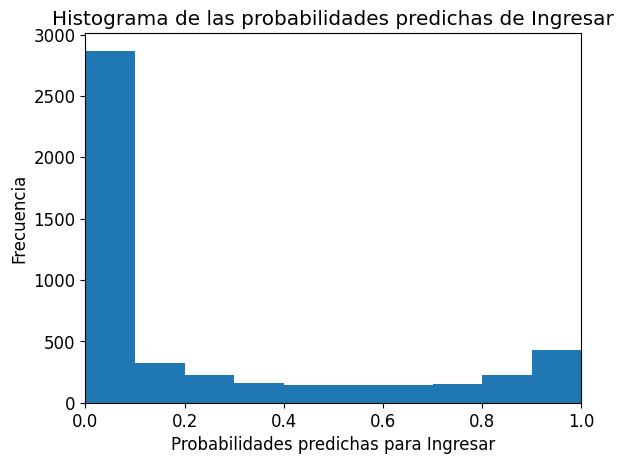

In [165]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histograma de las probabilidades predichas de Ingresar')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Probabilidades predichas para Ingresar')
plt.ylabel('Frecuencia')

In [100]:
from sklearn.preprocessing import binarize

for i in range(1,5):

    cm1=0

    y_pred1 = logreg.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold = i/10)

    y_pred2 = np.where(y_pred2 == 1, 'SI', 'NO')

    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[2861 1304]
 [   7  638]] 

 with 3499 correct predictions,  

 1304 Type I errors( False Positives),  

 7 Type II errors( False Negatives),  

 Accuracy score:  0.7274428274428274 

 Sensitivity:  0.9891472868217054 

 Specificity:  0.6869147659063626 



With 0.2 threshold the Confusion Matrix is  

 [[3174  991]
 [  14  631]] 

 with 3805 correct predictions,  

 991 Type I errors( False Positives),  

 14 Type II errors( False Negatives),  

 Accuracy score:  0.7910602910602911 

 Sensitivity:  0.9782945736434109 

 Specificity:  0.7620648259303722 



With 0.3 threshold the Confusion Matrix is  

 [[3387  778]
 [  23  622]] 

 with 4009 correct predictions,  

 778 Type I errors( False Positives),  

 23 Type II errors( False Negatives),  

 Accuracy score:  0.8334719334719335 

 Sensitivity:  0.9643410852713178 

 Specificity:  0.8132052821128452 



With 0.4 threshold the Confusion Matrix is  

 [[3541  624]
 [  29  616]] 

 with 

#ROC - AUC

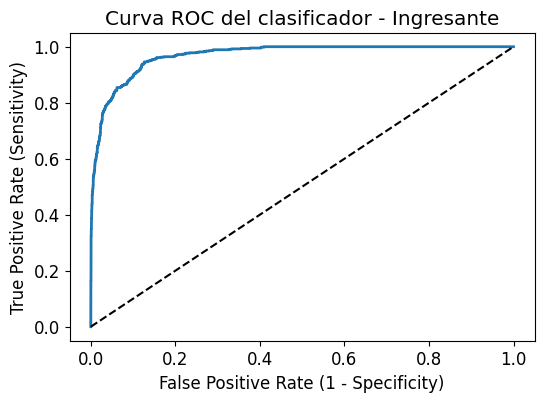

In [101]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'SI')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Curva ROC del clasificador - Ingresante')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [102]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

ROC AUC : 0.9690
Cross validated ROC AUC : 0.9668
Cross-validation scores:[0.88227651 0.87837838 0.88721414 0.88409563 0.88796465]
Average cross-validation score: 0.8840


#Optimización - Barrido de Hiperparámetros

In [103]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [104]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8867


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(class_weight='balanced', penalty='l1', random_state=0,
                   solver='liblinear')


In [105]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8879


#**Análisis de significancias**

In [106]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

#Regresamos al punto en donde eran X e y
X = df_modelo.drop(['INGRESO'], axis=1)
y = df_modelo['INGRESO']

#Codificaremos la variable dependiente como numérica
X['DOMICILIO_MACROREGION'] = pd.Categorical(X['DOMICILIO_MACROREGION'], categories=['LIMA', 'CENTRO', 'NORTE', 'SUR', 'ORIENTE'], ordered=False)
y1 = y.apply(lambda x: 1 if x == 'SI' else 0)

# Codificar la variable categórica predictora como variables dummy
X_dummies1 = pd.get_dummies(X['SEXO'], drop_first=True)  # Evitar la trampa de las variables dummy
X_dummies2 = pd.get_dummies(X['DOMICILIO_MACROREGION'], drop_first=True)  # Evitar la trampa de las variables dummy
X1 = pd.concat([X_dummies1,X_dummies2,X[['CALIF_FINAL','N_INTENTO','EDAD','ANIOS_DE_EGRESO_COLEGIO']]],axis=1)


#############################
#Checkeo y retiro de Outliers (Los límites de hallaraon anteriormente)
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

X1['N_INTENTO'] = max_value(X1, 'N_INTENTO', 5)
X1['EDAD'] = max_value(X1, 'EDAD', 31)
X1['ANIOS_DE_EGRESO_COLEGIO'] = max_value(X1, 'ANIOS_DE_EGRESO_COLEGIO', 11)

##########################
#Escalado de las variables
cols = X1.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
X1 = pd.DataFrame(X1, columns=[cols])

#######################################
X1 = sm.add_constant(X1)
# Eliminar filas con valores faltantes
X1 = X1.dropna()
y1 = y1[X1.index]  # Asegúrate de que `y` coincida con el índice de `X`

#########################################################
# Dividir los datos en conjunto de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

##################################################
# Calcular los pesos inversos para las clases (compensar el desbalance)
class_counts = y1_train.value_counts()
total_count = len(y1_train)

# Calcular los pesos inversamente proporcionales
weights = y1_train.apply(lambda x: total_count / (class_counts[x] * len(class_counts)))
##################################################
# Ajustar el modelo de regresión logística binaria
modelo = sm.Logit(y1_train, X1_train)
resultado = modelo.fit(weights=weights)

# Mostrar el resumen del modelo
print(X.SEXO.unique())
print(X.DOMICILIO_MACROREGION.unique())
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.146592
         Iterations 9
['FEMENINO', 'MASCULINO']
Categories (2, object): ['FEMENINO', 'MASCULINO']
['CENTRO', 'LIMA', 'NORTE', 'SUR', 'ORIENTE']
Categories (5, object): ['LIMA', 'CENTRO', 'NORTE', 'SUR', 'ORIENTE']
                           Logit Regression Results                           
Dep. Variable:                INGRESO   No. Observations:                19239
Model:                          Logit   Df Residuals:                    19229
Method:                           MLE   Df Model:                            9
Date:                Fri, 06 Sep 2024   Pseudo R-squ.:                  0.6225
Time:                        23:42:06   Log-Likelihood:                -2820.3
converged:                       True   LL-Null:                       -7471.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: weights. After release 0.14, this will raise.
  warnings.warn(


In [107]:
#Las variables significativas de acuerdo al reporte son:
##MACROREGION_LIMA // CENTRO (Aplicar Test de Razón de Verosimilitud)
##CALIF_FINAL
##ANIOS_DE_EGRESO_COLEGIO

#Las variables que se encuentraa cerca a ser significativa:
##SEXO_MASCULINO // FEMENINO

##**Análisis de impacto de Odds**

In [164]:
########## MACROREGION ##################  (Requiere aplicar Test de Razón de Verosimilitud, pero el objetivo del modelo de identificar el efecto de los parámetros completado)

##MACROREGION_CENTRO RESPECTO A LIMA
razon_odds_1 = np.exp(-0.3166)
(razon_odds_1-1)*100
print('Un cambio de macroregion Lima a Centro vera su oprtunidad de ingreso reducida en',round((razon_odds_1-1)*100,2),'%')
##MACROREGION_NORTE RESPECTO A LIMA
razon_odds_2 = np.exp(-0.2738)
(razon_odds_2-1)*100
print('Un cambio de macroregion Lima a Norte vera su oprtunidad de ingreso reducida en',round((razon_odds_2-1)*100,2),'%')
##MACROREGION_SUR RESPECTO A LIMA
razon_odds_3 = np.exp(-0.2653)
(razon_odds_3-1)*100
print('Un cambio de macroregion Lima a Sur vera su oprtunidad de ingreso reducida en',round((razon_odds_3-1)*100,2),'%')
##MACROREGION_ORIENTE RESPECTO A LIMA
razon_odds_4 = np.exp(-0.3716)
(razon_odds_4-1)*100
print('Un cambio de macroregion Lima a Oriente vera su oprtunidad de ingreso reducida en',round((razon_odds_4-1)*100,2),'%')

Un cambio de macroregion Lima a Centro vera su oprtunidad de ingreso reducida en -27.14 %
Un cambio de macroregion Lima a Norte vera su oprtunidad de ingreso reducida en -23.95 %
Un cambio de macroregion Lima a Sur vera su oprtunidad de ingreso reducida en -23.3 %
Un cambio de macroregion Lima a Oriente vera su oprtunidad de ingreso reducida en -31.04 %


In [109]:
############### SEXO ################## (Variable estadísticamente no significativa, pero interesante de analizar)

##SEXO_MASCULINO RESPECTO A FEMENINO
razon_odds_5 = np.exp(-0.1524)
(razon_odds_5-1)*100
print('Estadísticamente el genero femenino respecto al masculino ve su oprtunidad de ingreso reducido en',round((razon_odds_5-1)*100,2),'%')


Estadísticamente el genero femenino respecto al masculino ve su oprtunidad de ingreso reducido en -14.14 %


In [110]:
############### ANIOS_DE_EGRESO_COLEGIO ################## (Variable significativa)

##AÑOS DESDE EL EGRESO DEL COLEGIO
razon_odds_7 = np.exp(1.6660)
(razon_odds_7-1)*100
print('Estadísticamente el incremento de 1 unidad en el año desde el egreso incrementa la oprtunidad de ingreso en',round((razon_odds_7-1)*100,2),'%')
print('Asimismo, nótese que la cantidad de inscritos a medida pasan los años de egreso se reduce drásticamente')
print('Por lo que la retención de estudiantes en los primeros 5 años desde el egreso es fundamental para incrementar la oportunidad de ingreso')

Estadísticamente el incremento de 1 unidad en el año desde el egreso incrementa la oprtunidad de ingreso en 429.1 %
Asimismo, nótese que la cantidad de inscritos a medida pasan los años de egreso se reduce drásticamente
Por lo que la retención de estudiantes en los primeros 5 años desde el egreso es fundamental para incrementar la oportunidad de ingreso


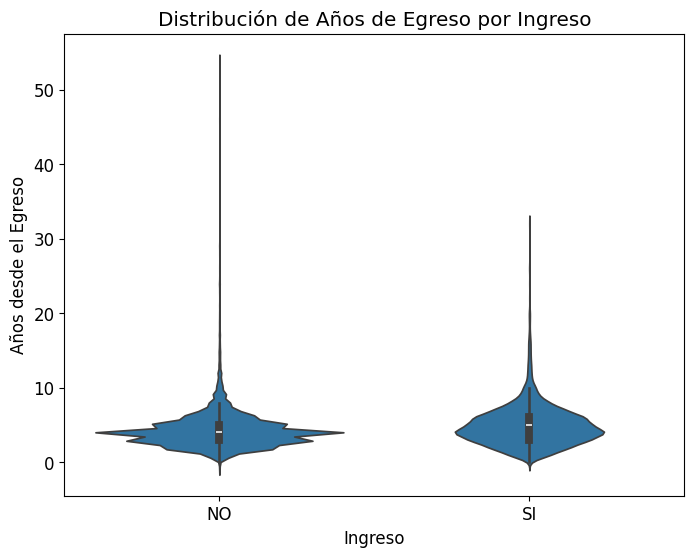

In [111]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='INGRESO', y='ANIOS_DE_EGRESO_COLEGIO', data=df_modelo, inner='box')
plt.title('Distribución de Años de Egreso por Ingreso')
plt.xlabel('Ingreso')
plt.ylabel('Años desde el Egreso')
plt.show()